# Understanding Variance
Statistics is an area of science concerned with understanding uncertainty through the building of *models*. Although your prior experiences may have left the impression that statistics is about *hypothesis tests*, the reality is that this is a very narrow perspective. The concept of a data analysis being an exercise in *model building* is fundamental to a much deeper understanding of statistics, and is fundamental to your success on the rest of this course. To facilitate this, we will start with some core principles that are essential for developing an intuitive understanding of statistical models. Perhaps more than any other concept in statistics, the idea of *variance* is essential for understanding what purpose a statistical model serves.

## Defining Variance
Variance is the basic currency of statistics. It is the fundamental information that data holds and is the feature of data that all statistical models aim to capture. Variance is therefore a very important concept and so we need to be clear on what *exactly* variance is. Informally, the idea of variance is very simple. For a given set of data, we want to understand the reason why the measured values are different from each other. In other words, why does the data *vary*? If data did not vary, it would be constant. Every time we took a measurement we would get the same value. In this scenario, the data would be *perfectly predictable* and there would be no need for statistics.

As an example, consider the plot of all the measurements of `mpg` from the `mtcars` dataset[^foot1] shown below. Clearly, the values of `mpg` differ from car-to-car. This is expected, but take a moment to consider *why* this is the case? 

In [1]:
options(repr.plot.width=12, repr.plot.height=7)

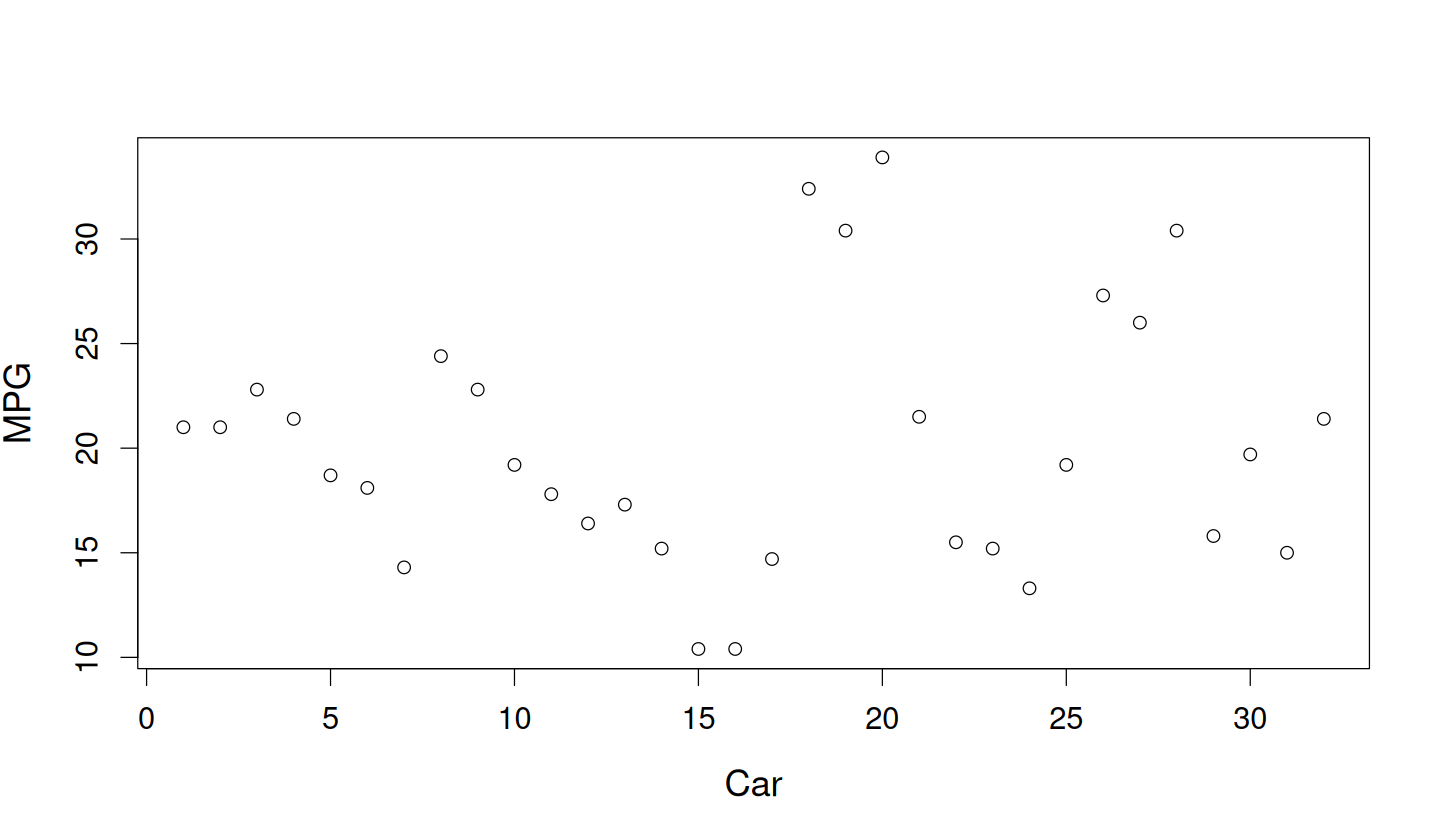

In [2]:
data('mtcars')
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mtcars$mpg)), y=mtcars$mpg, xlab="Car", ylab="MPG")

The most obvious answer here is that cars have different properties, such as their weight or their engine size. However, there will also be a degree of natural variation due to limitations in the precision of measurement. Importantly, some of these sources we can measures, whereas others we cannot. This is an important distinction within statistics and is sometimes known as *reducible* versus *irriducible* error.


Considering the different sources of the variation in `mpg` is the first step towards building a statistical model. Indeed, thinking about the problem and considering various possibilities is one of the first things an analyst should do when presented with a new dataset. By doing so, you are starting to build your own mental model of the observed variance. All statistics does is allow this process to be formalised. 


## Measuring Variance
In order to start understanding the variance we can observe, we need some way of *quantifying* it. As mentioned above, our question is really about how far any set of data are from being *constant*. If we consider this to be the definition of *no variance*, then our measure must capture how far away our data are from a constant state. But what constant value should we pick for the comparisons? We could select something arbitrary (e.g. 0, 100, 1000), however the better choice is to use *the mean*. Because the mean is, by definition, the closest point to *all* the data, it will yield the smallest measure of variance and thus will provide the best metric for determining how close the data are to constant.

To see this visually, the mean value of `mpg` is visualised as a horizontal line in the plot below. This provides our *yardstick* for measuring variation against. 

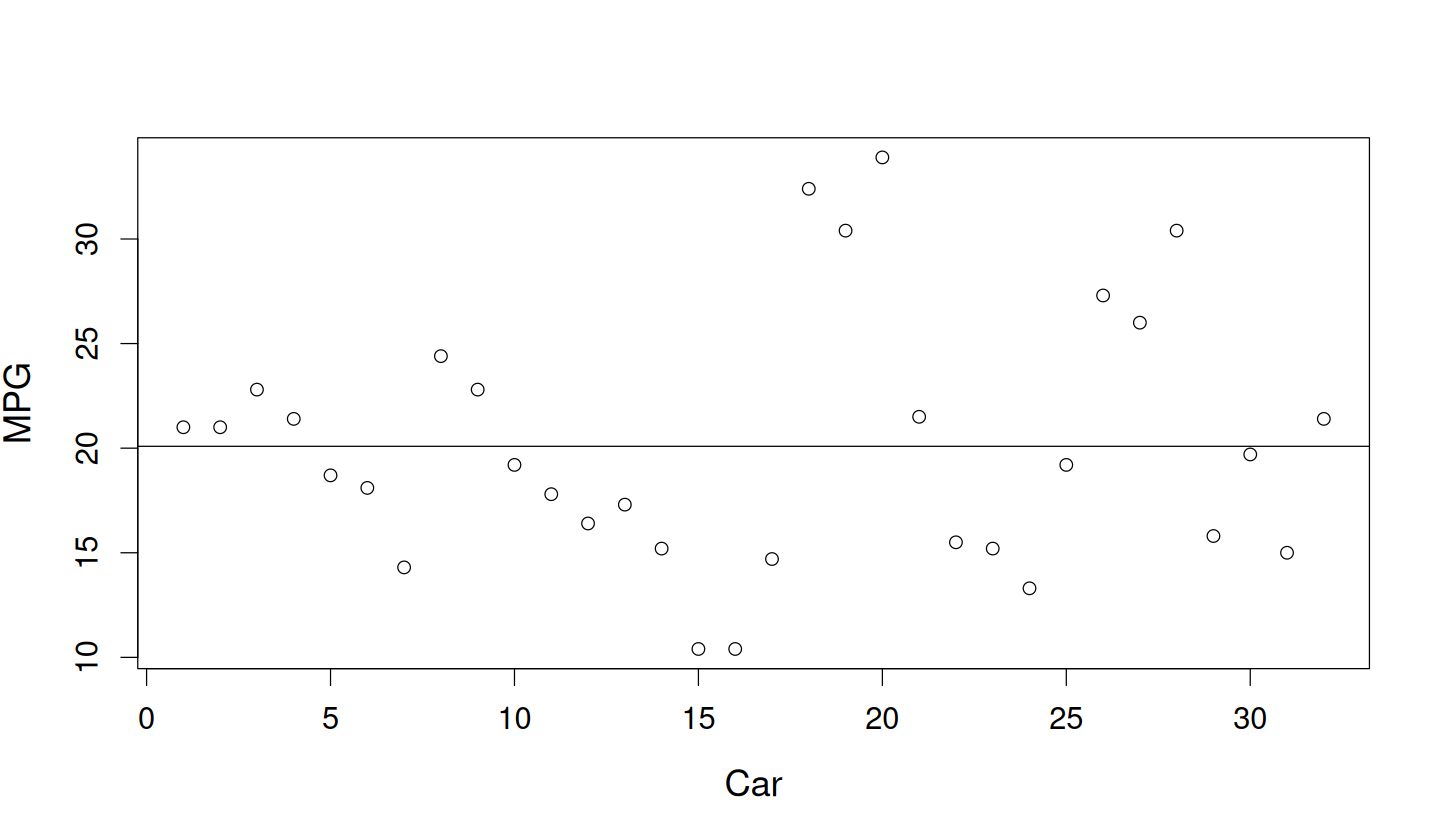

In [3]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mtcars$mpg)), y=mtcars$mpg, xlab="Car", ylab="MPG")
abline(h=mean(mtcars$mpg))

The vertical distances from the mean to each data point therefore tells us how much variation there is to explain. These are shown on the plot below. 

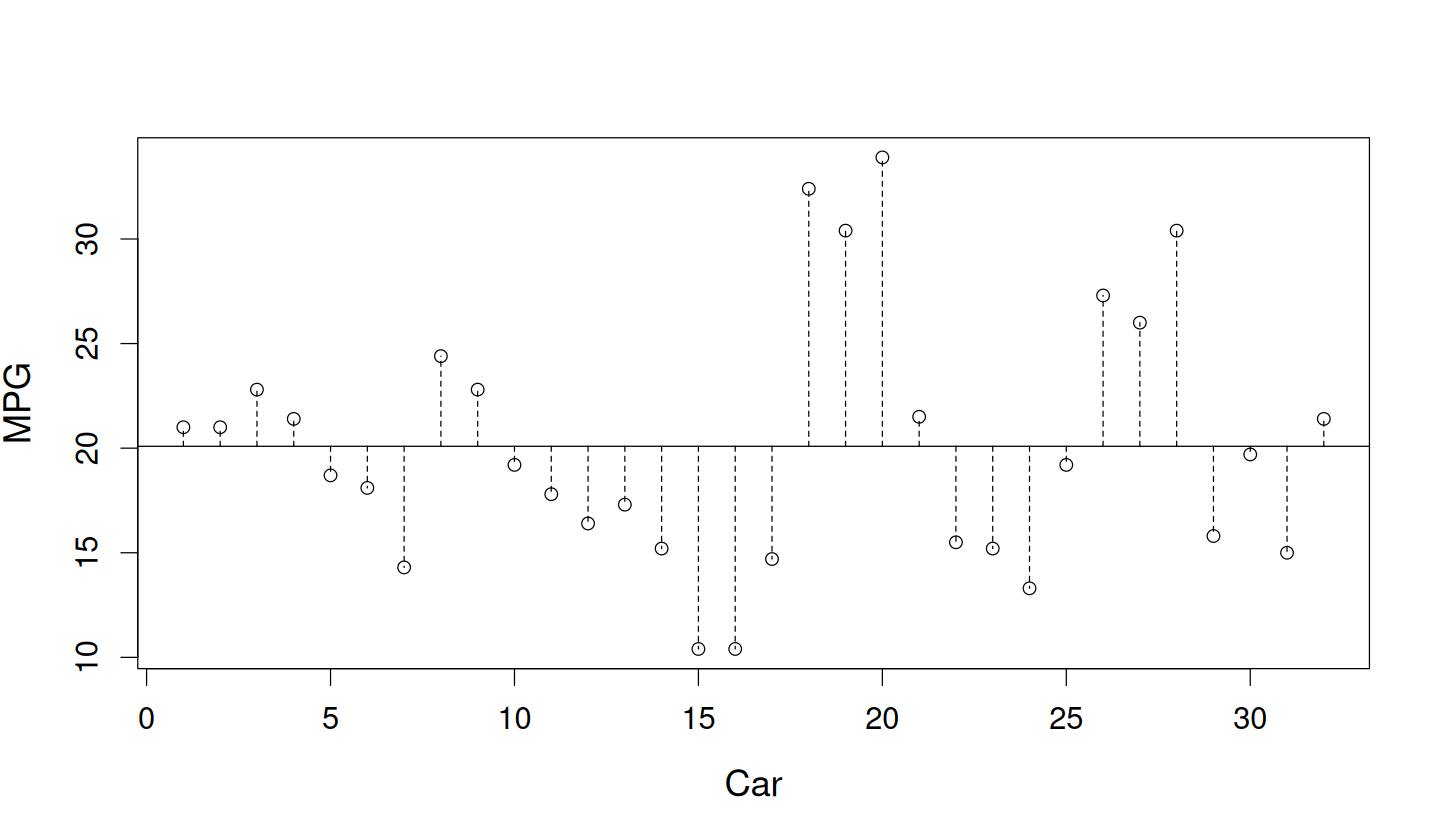

In [4]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=1:length(mtcars$mpg), y=mtcars$mpg, xlab="Car", ylab="MPG")
abline(h=mean(mtcars$mpg))
for (i in 1:length(mtcars$mpg)){
    x.start <- i
    x.end   <- i
    y.start <- mean(mtcars$mpg)
    y.end   <- mtcars$mpg[i]
    lines(x=c(x.start,x.end), y=c(y.start,y.end), lty=2)
}

For instance, datapoint 1 sits *above* the mean and datapoint 7 sits *below* the mean. Their vertical distances are therefore

In [5]:
mtcars$mpg[1] - mean(mtcars$mpg)
mtcars$mpg[7] - mean(mtcars$mpg)

[1] 0.909375

[1] -5.790625

In order to get an *overall* sense of the variation across all the cars, we might first think to *sum* these distances. However, if we do that then we get a result that is essentially 0

In [6]:
sum(mtcars$mpg - mean(mtcars$mpg))

[1] 1.421085e-14

The problem is that the mean is, by definition, *perfectly* in the middle of all the data and thus all the positive and negative distances will cancel and we will be left with nothing. Instead, we *square* the values[^foot2] before summing them

In [7]:
sum((mtcars$mpg - mean(mtcars$mpg))^2)

[1] 1126.047

This values is known as a *sum of squares* and provides some indication of the variation in this data set. However, it is confounded by the fact that it is sensitive to the number of data points. For instance, we could get the same value from a data set with many data points near to the mean and a data set with a small number data points spread out from the mean. Our visual sense of variance does not depend on the amount of data, rather, it depends upon how far the data are from the mean *in general*. As such, the final step is to divide by the number of data points to produce an *average* squared distance from the mean.

In [8]:
sum((mtcars$mpg - mean(mtcars$mpg))^2) / length(mtcars$mpg)

[1] 35.18897

From this, we can conclude that the average squared distance from the mean is $35.19$. This is the total amount of *variance* within these data and thus indicates the value that we want to explain. Very generally, the aim of a statistical model is to break this value up into independent chunks that can be attributed to different sources.

`````{admonition} Bessel's Correction
:class: tip
In the example above, we simply divided the sum-of-squares by $n$ to give the average squared distanced within this data set. Although intuitive, there is a problem with doing this. In general, when working with a dataset, we do not have access to all the data that defines our *population* of interest. Instead, our data is treated as a *sample* from that population. Ultimately, we want to use the sample to learn about the population. As such, we use the data to make *estimates* of the properties of the population. Variance is one such example. In general, we are interested in the variation within the *population* and not the *sample*. As it turns out, estimating the population variance by dividing the sum-of-squares by $n$ produces a value that is *biased*. What this means is that this method of estimation will not, on average, capture the true value of the population variance. To get around this, we have to use something called [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). Very simply, this means that we divide by $n-1$ instead of $n$. If we had the whole population at our disposal, then dividing by $n$ is fine. As such, the example above assumes that the cars in the `mtcars` dataset are the only cars we care about and thus represent the whole population. If, instead, we wished to treat the cars as a *sample*, we would need to divide by $n-1$. Notably, the built-in `var()` function in `R` will always divide by $n-1$, as this is the most common use case.
`````

## Interpreting Variance
Although we now have some measure of variance, one of the disadvantages of the definition given above is that it is expressed in squared-units of the variable in question. This can be quite hard to interpret. For some problems, this does not matter because the variance is simply a quantity that we wish to manipulate in some fashion. You can think of this as similar to a recipe where ingredient weights are given in either grams or ounces. It does not matter which one we use as the important element is their *ratio*, not the actual interpretation of the amounts. However, there are cases where we may wish to *interpret* the meaning of the variance units, which will usually require some form of conversion.

### The Standard Deviation
When interpretation matters, it is more usual to use $\sigma$ rather than $\sigma^{2}$, by taking the square-root of the variance. This produces a value in the original units of the variable and can be interpreted as the average deviation from the mean. This should be familiar to you as the *standard deviation*. 

As an example, if we recalculate the variance of `mpg` using Bessel's correction, we have

In [9]:
var(mtcars$mpg)

[1] 36.3241

Taking the square-root gives us the standard deviation

In [10]:
sqrt(var(mtcars$mpg))

[1] 6.026948

Which we can also achieve with less typing by using the `sd()` function

In [11]:
sd(mtcars$mpg)

[1] 6.026948

So, the average amount that cars deviate from the mean is estimated to be 6.03 MPG. Here, we can more easily interpret the average amount of variation within the data using the original units.

### Scaling Distances
As well as a means of more easily interpreting variance, it can also be useful sometimes to express individual distances in units of standard deviation. This is because we can standardises distances measured on different scales onto the same scale, making intepretation easier and comparisons across different measurements possible. 

As an example, we saw earlier that datapoint 7 was 5.79 MPG below the mean. The standard deviation for this dataset was calculated above as $\sigma = \sqrt{36.32} = 6.03$. If we divide these values, we can express datapoint 7's discrepancy in terms of standard deviations, giving $\frac{-5.79}{6.03} = -0.96$. As such, we can say that datapoint 7 lies 0.98 standard deviations below the mean, irrespective of the original units of the data. This type of scaling is sometimes known as a $z$-score transformation and is shown for all the data from `mtcars` in the plot below

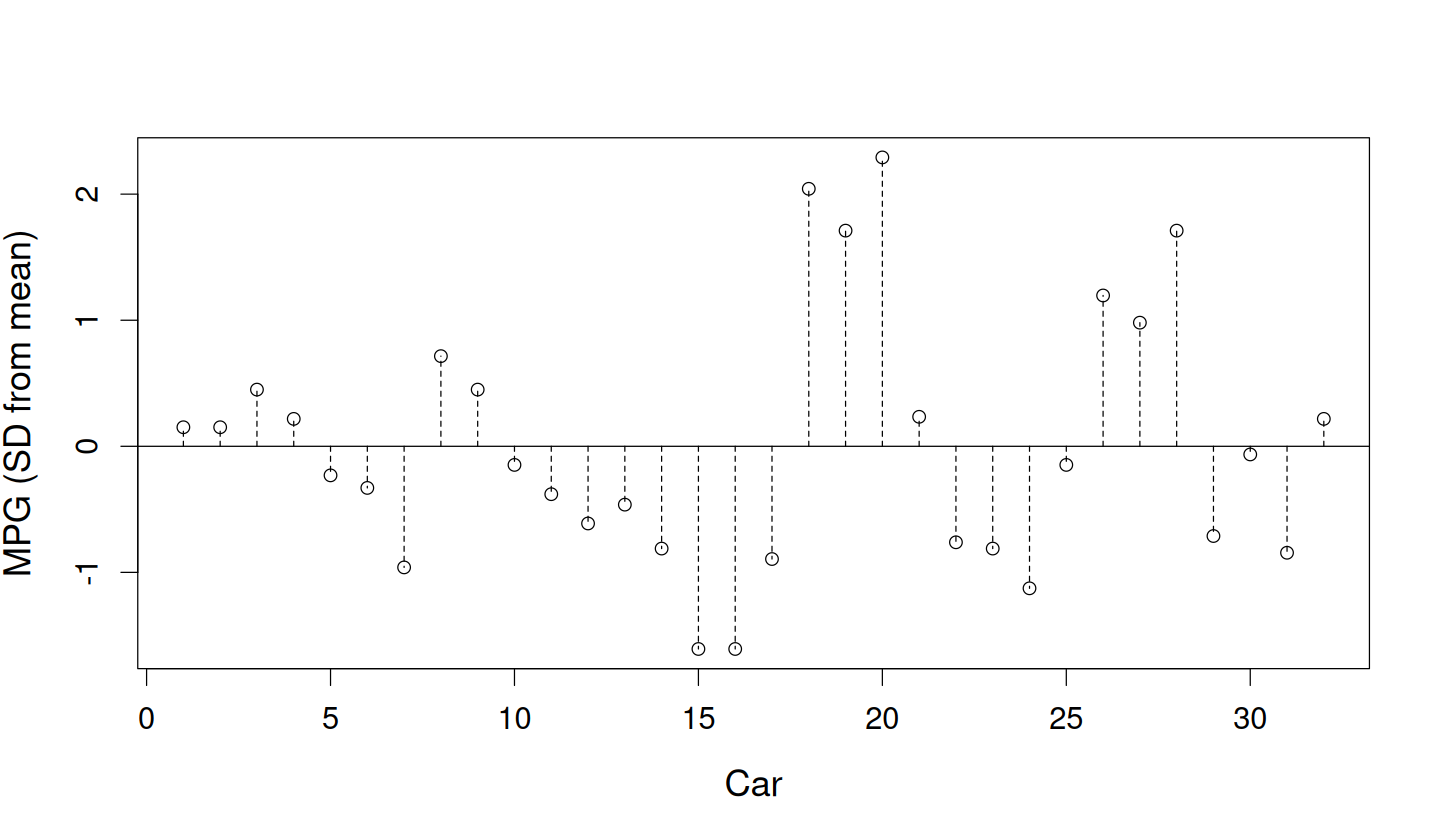

In [ ]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
std.mpg <- (mtcars$mpg - mean(mtcars$mpg)) / sd(mtcars$mpg)
plot(x=1:length(std.mpg), y=std.mpg, xlab="Car", ylab="MPG (z-score)")
abline(h=0)
for (i in 1:length(std.mpg)){
    x.start <- i
    x.end   <- i
    y.start <- 0
    y.end   <- std.mpg[i]
    lines(x=c(x.start,x.end), y=c(y.start,y.end), lty=2)
}



This scaling of distances is most usually found in the calculation of *effect sizes* and in the calculation of *test statistics*. In both cases, rendering an effect expressed in the original units of the data into an effect expressed in standard deviation units allows for comparisons across different dataset and allows us to reach generic conclusions, irrespective of the original units of the data. We will discuss this in more detail later in this unit, but it is useful to get a sense of how the standard deviation can be used to *standardise* values at this point.

`````{topic} What do you now know?
In this section, we have explored the important concept of *variance* as the primary source of information within any data set. After reading this section, you should have a good sense of:

- What variance is, in terms of data points differing in value from one another.
- How variance can be measured by defining a baseline value (usually the *mean*) and measuring the vertical distances from that baseline.
- Why it is more typical to divide by $n-1$ when calculating the variance.
- How variance can be interpreted, particularly in terms of taking the square-root to calculate the *standard deviation*.
- How the standard deviation can be used to scale distances into the same units, irrespective of the data in question.
`````

[^foot1]: The `mtcars` dataset is included with `R` and contains various measurements from a sample of cars. You can read more about it by typing `?mtcars` at the prompt.

[^foot2]: You might think that taking the *absolute value* of the data before summing would make more sense. This is a metric known as the *mean absolute deviation* (MAD), which is a perfectly legitimate way of measuring the *spread* of data around a central point. However, using squared values has some useful properties. Firstly, it *emphasises* larger distances in the sum, which emphasises the importance of bigger discrepancies from the mean. From a mathematical perspective, squares are also easier to work with and manipulate compared to something like the absolute value.